In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

 # extracting data from two different sheets , joining them based on the order date column 

In [2]:
df_sales = pd.read_excel("sales forcasting.xls" , sheet_name = "sales")
df_date = pd.read_excel("sales forcasting.xls" , sheet_name = "date")

In [3]:
df = pd.merge(df_sales , df_date , on = "Order ID" , how = "left")

In [4]:
df.head()

,Order ID,Sales,Order Date
0,CA-2016-152156,731.94,2016-08-11 00:00:00
1,CA-2015-106320,1044.63,25-09-2015
2,CA-2016-121755,90.57,16-01-2016
3,CA-2016-169194,45.00,20-06-2016
4,CA-2015-135545,146.73,24-11-2015


# Data Pre-processing phase

In [5]:
df = df.drop('Order ID' , axis=1)

In [6]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df = df.sort_values('Order Date')
df.head()

C:\Users\kamel\AppData\Local\Temp\ipykernel_6728\61832525.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Order Date'] = pd.to_datetime(df['Order Date'])


,Sales,Order Date
4220,468.900,2014-01-02
8157,17.472,2014-01-03
670,5.940,2014-01-03
8302,137.352,2014-01-03
8275,129.552,2014-01-03


In [7]:
df = df.groupby('Order Date').sum()
df=df.resample(rule='MS').sum() 
df.head(50)

,Sales
Order Date,
2014-01-01,28953.7060
2014-02-01,12743.1080
2014-03-01,54801.9060
2014-04-01,24710.0160
2014-05-01,29639.8340
2014-06-01,29287.0306
2014-07-01,35341.2460
2014-08-01,37854.5475
2014-09-01,66110.2238


# Visual Inspection 

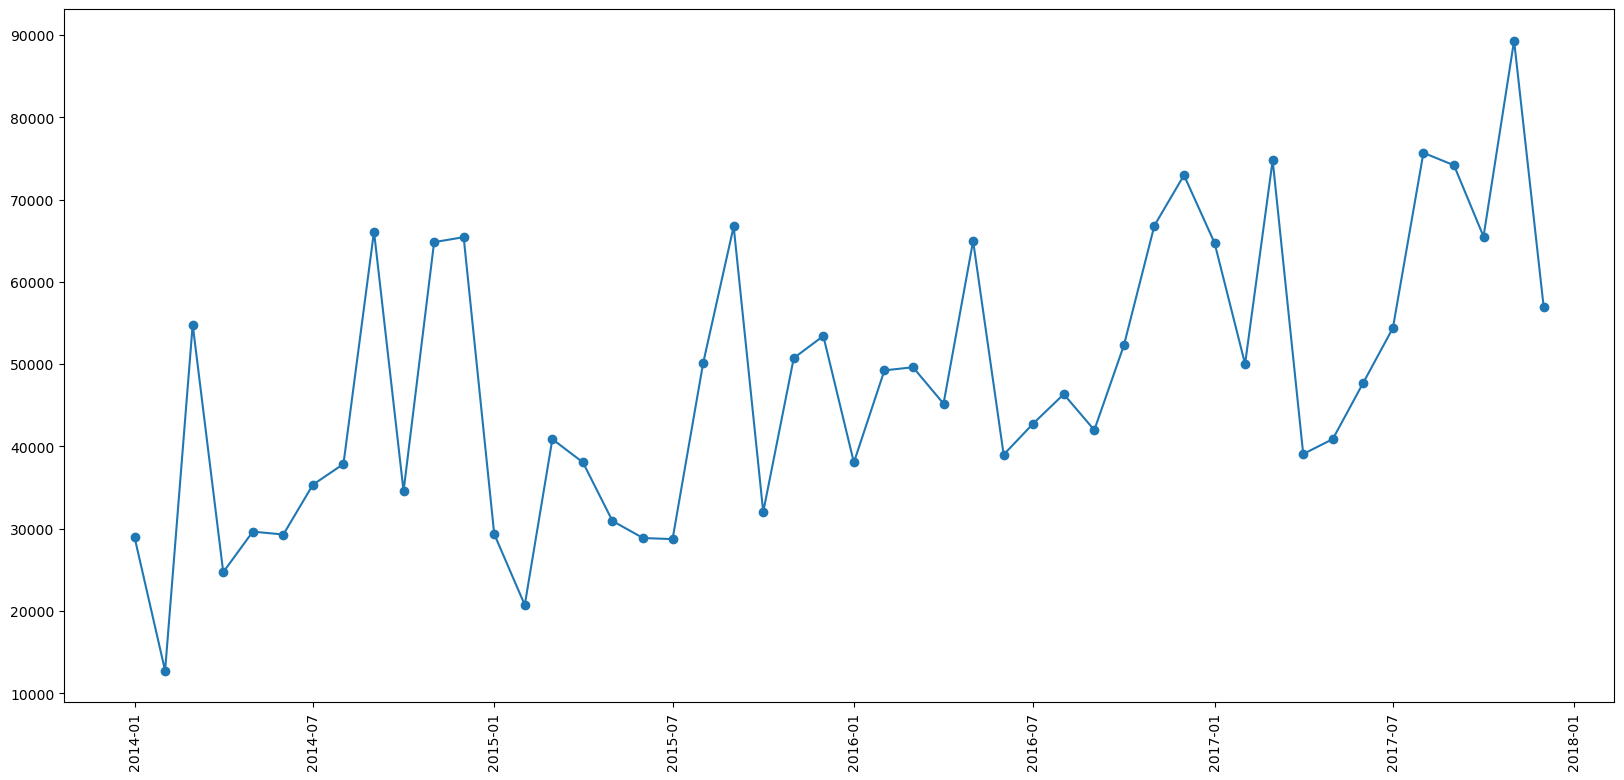

In [8]:
plt.figure(figsize=(20,9))
plt.plot(df.index ,df.values , marker = 'o')
plt.xticks(rotation = 90)
plt.show()

- the data seems to be stationary around trend , the series seems to have an upwarding trend , and some sort of unclear seasonality  

# is data really stationary?
-KPSS TEST

In [9]:
# perform the KPSS test to tell if the data is stationary or not 
import statsmodels.api as sm
kpss_results = sm.tsa.stattools.kpss(df['Sales'], regression='ct')
if kpss_results[0] < kpss_results[1]:
    print('The time series is stationary (around trend).')
else:
    print('The time series is not stationary.')

The time series is stationary (around trend).


C:\Users\kamel\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


# decomposition


- decomposing the series , so we could tell wether the trend and seasonality are multiplicative or additive , then we can set the forecasting model properties

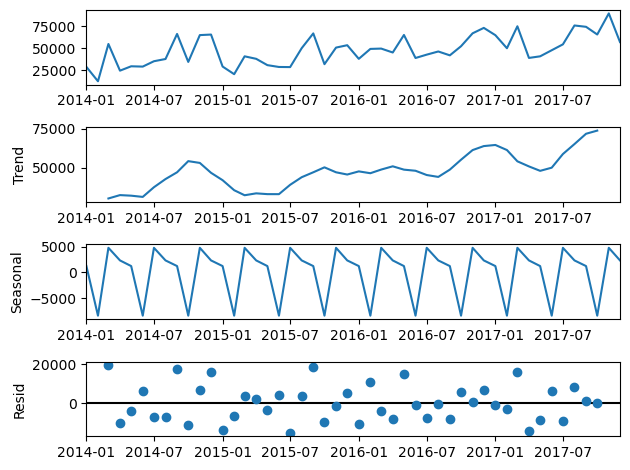

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df, model='additive', period=4)
decomposition.plot();

- additive series with upwarding multiplicative trend 

# TREND

<Axes: xlabel='Order Date'>

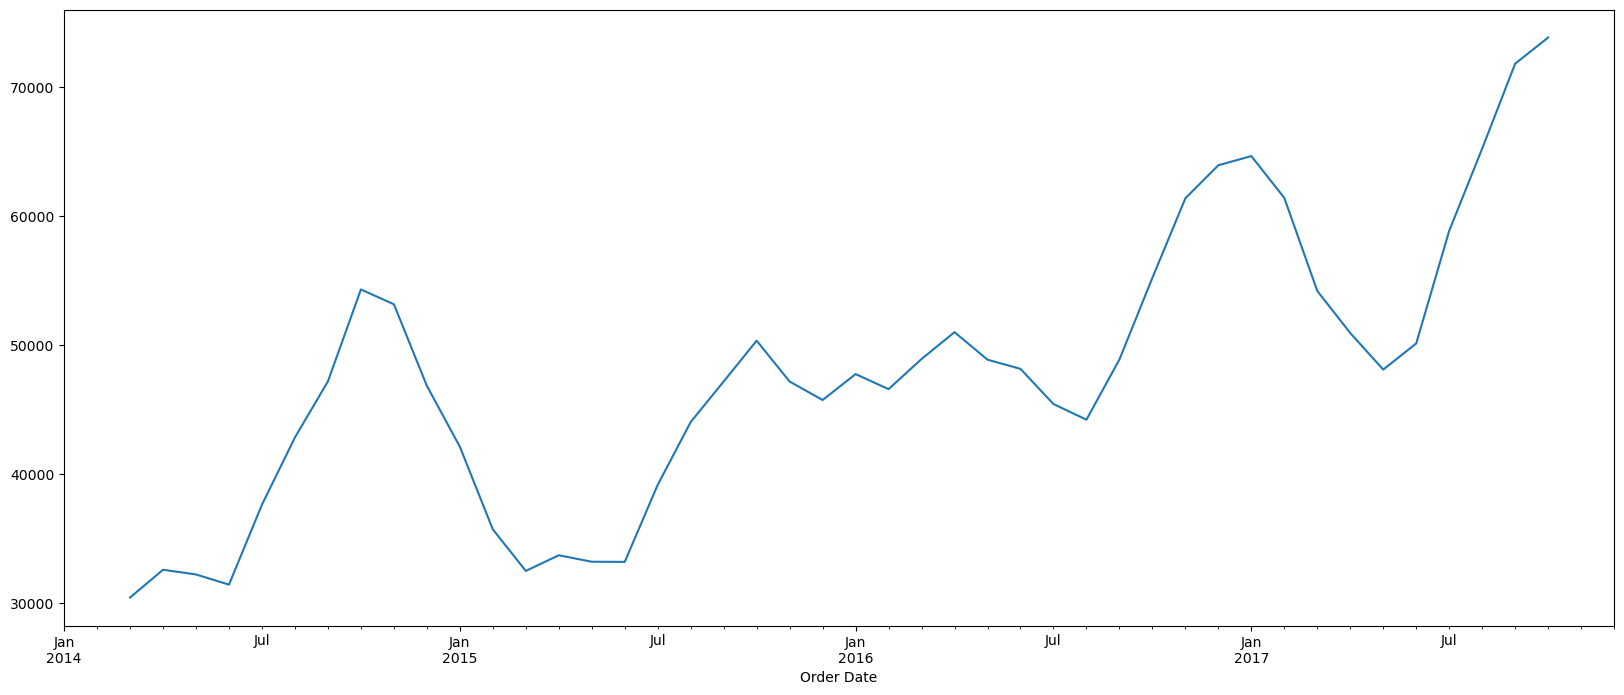

In [11]:
plt.figure(figsize=(20,8))
decomposition.trend.plot()

- multiplicative trend

# splitting the data into train and test : train on data of (2014 - 2015 - 2016) and test the model on data of (2017) 

In [12]:
train = df[:36]
test = df[36:]
train

,Sales
Order Date,
2014-01-01,28953.7060
2014-02-01,12743.1080
2014-03-01,54801.9060
2014-04-01,24710.0160
2014-05-01,29639.8340
2014-06-01,29287.0306
2014-07-01,35341.2460
2014-08-01,37854.5475
2014-09-01,66110.2238


In [13]:
test

,Sales
Order Date,
2017-01-01,64734.3110
2017-02-01,50011.4894
2017-03-01,74774.0838
2017-04-01,39072.0016
2017-05-01,40882.4464
2017-06-01,47742.3255
2017-07-01,54382.0875
2017-08-01,75675.3040
2017-09-01,74164.6080


# applying the statistical Holt winters model to train and fit the data 
- due to data properties and the number of months desired to predicted we choosed this model , as it works well with stationary data and multiple predicted values 

# Holt winters model

In [14]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

es = ExponentialSmoothing( train.Sales , trend ='mul', seasonal='add', seasonal_periods=4).fit()

# Make predictions for the year (2017)
forecast = es.forecast(12)

forecast



C:\Users\kamel\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


2017-01-01    61889.508803
2017-02-01    53589.526900
2017-03-01    76831.311839
2017-04-01    71330.797214
2017-05-01    71738.672314
2017-06-01    63806.622983
2017-07-01    87430.085254
2017-08-01    82325.506178
2017-09-01    83144.107687
2017-10-01    75638.128161
2017-11-01    99703.576812
2017-12-01    95057.495285
Freq: MS, dtype: float64

In [15]:
per =  np.sum(test) / np.sum(forecast) * 100
per

Sales    79.482592
dtype: float64

# Accuracy Evaluation

- applying mean square error 

In [16]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(test,forecast))


20725.454706197666

In [17]:
df.Sales.mean() 


47858.351256250004

In [18]:
np.sqrt(df.Sales.var())

16893.845067068534

-Comparing the standard deviation of the mean to the square root of the predicted mean square error , we can tell that the error proportion is acceptable 

# visualizing the series of the past 3 years and the current forecasted year (test year) 

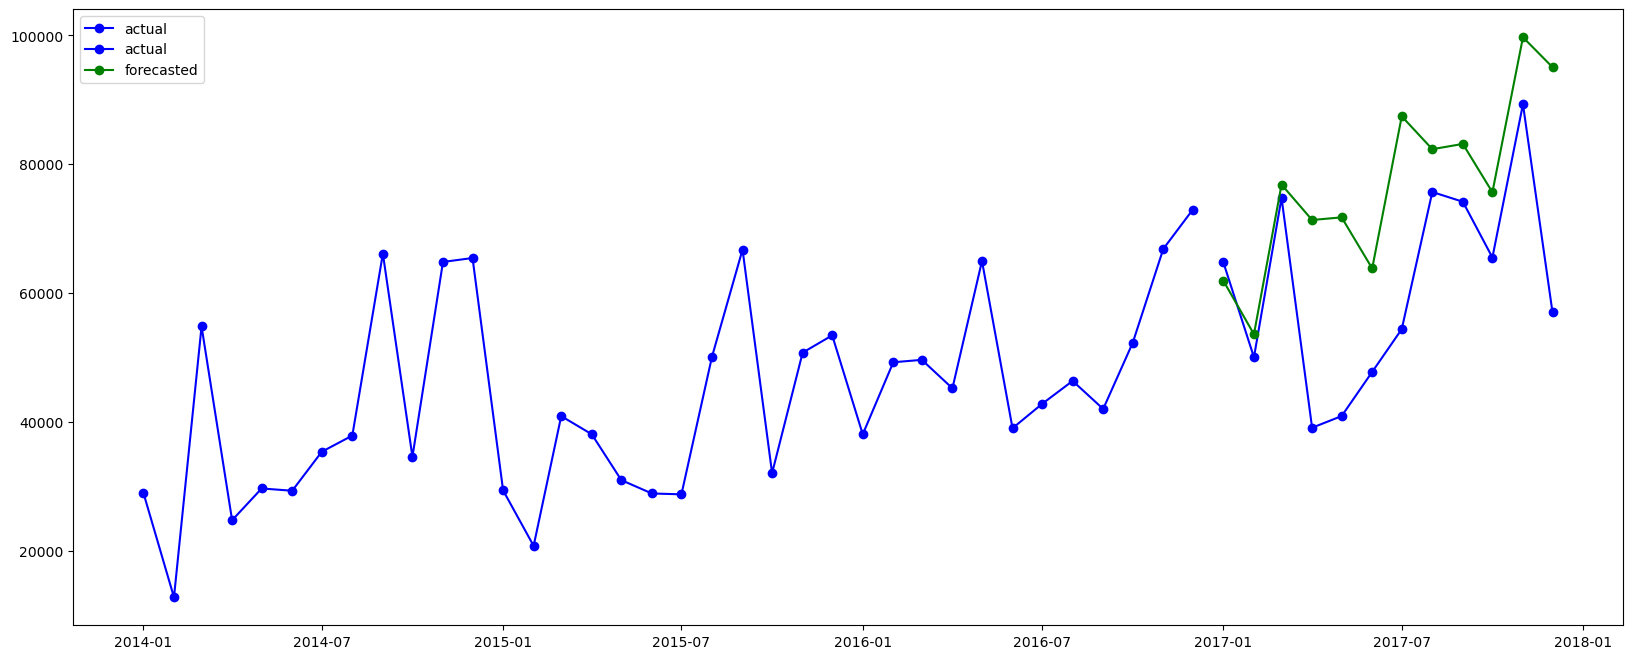

In [24]:
plt.figure(figsize=(20,8))
plt.plot(train , marker = "o" , color = "blue" , label='actual')
plt.plot(test , marker = "o" , color = "blue" , label='actual')
plt.plot(forecast , marker = "o" , color = "green", label='forecasted')
plt.legend()

# notice : the model performes really well with first two months of forecasted 2017

# SEASONALITY

<Axes: xlabel='Order Date'>

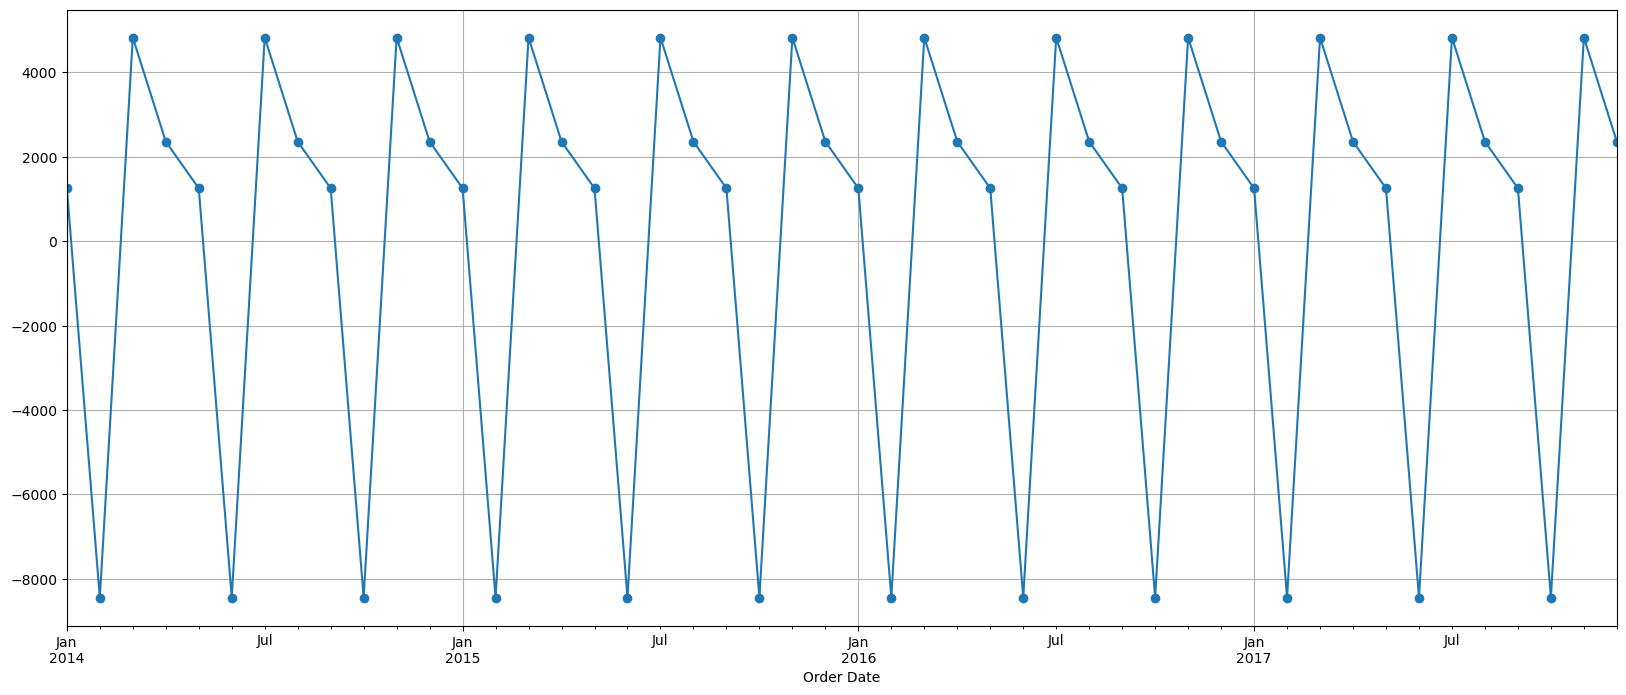

In [20]:
plt.figure(figsize=(20,8))

decomposition.seasonal.plot(marker ='o' , grid = True)


# peak-months (march - july - november)

# tail-months (january - may - september)

# RESIDUAL

<Axes: xlabel='Order Date'>

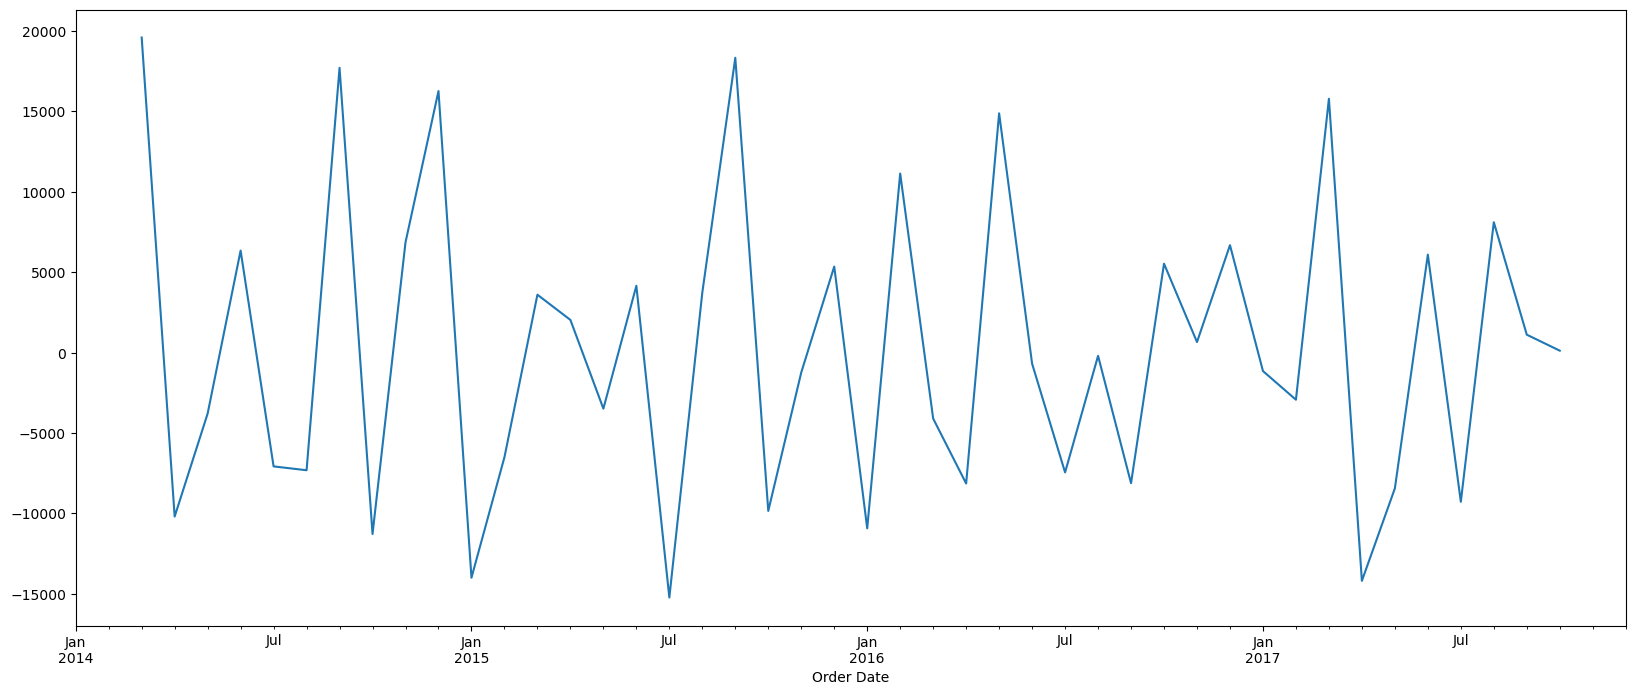

In [21]:
plt.figure(figsize=(20,8))
decomposition.resid.plot()

# final model 

In [22]:
es = ExponentialSmoothing( df.Sales , trend ='mul', seasonal='add', seasonal_periods=4).fit()

# Make predictions for the year (2017)
forecast18 = es.forecast(12)

forecast18


C:\Users\kamel\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


2018-01-01     70941.261834
2018-02-01     62011.828365
2018-03-01     84574.966688
2018-04-01     78350.025610
2018-05-01     77979.749217
2018-06-01     69217.743964
2018-07-01     91952.293206
2018-08-01     85902.840490
2018-09-01     85712.226892
2018-10-01     77134.158168
2018-11-01    100057.019336
2018-12-01     94200.358019
Freq: MS, dtype: float64

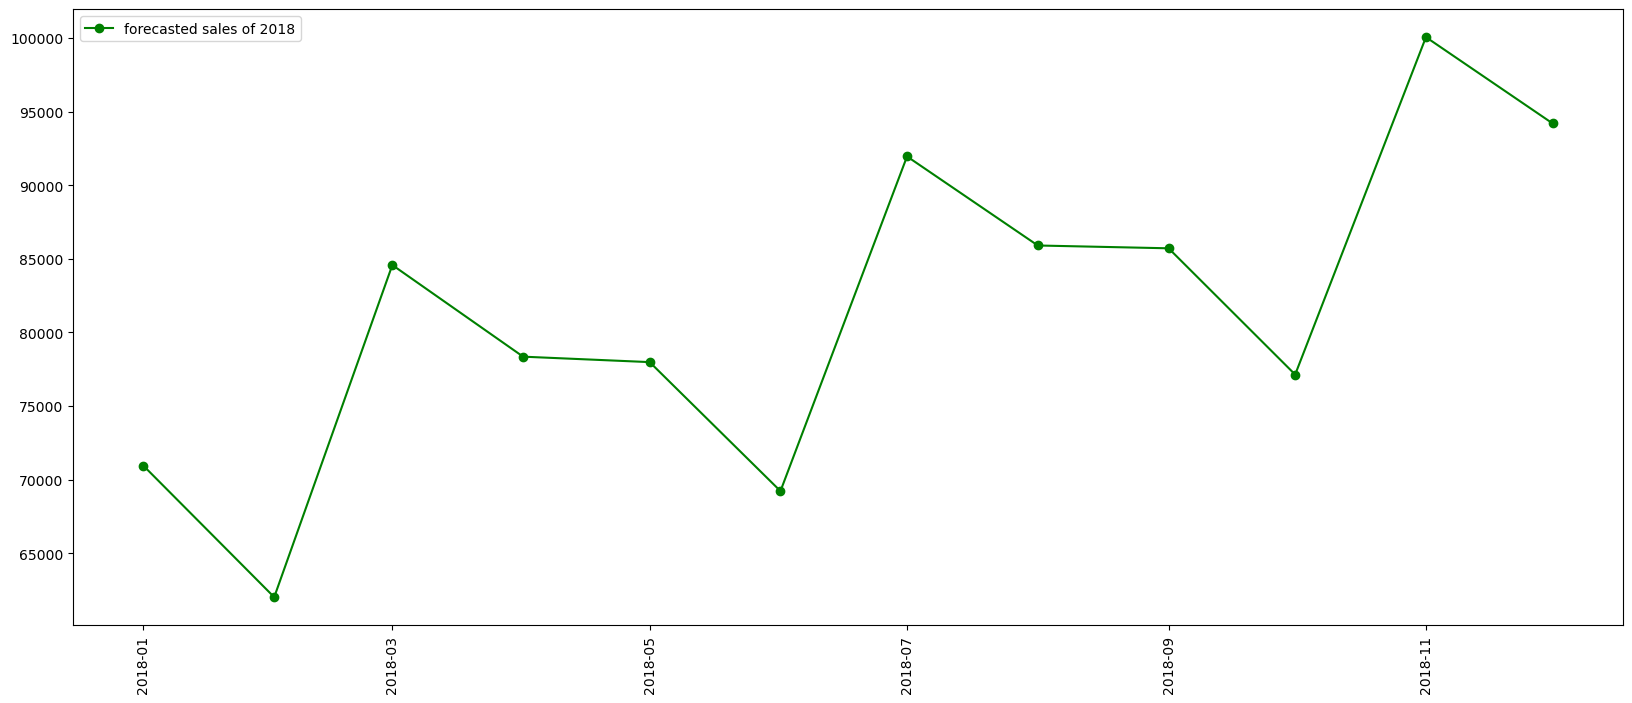

In [23]:
plt.figure(figsize=(20,8))
plt.plot(forecast18 , marker ='o' , color = "green" , label = 'forecasted sales of 2018');
plt.xticks(rotation =90)
plt.legend()